In [47]:
import numpy as np;import pandas as pd;

wine = pd.read_csv(r'C:\Users\SONY\Desktop\NumPy\wine.data',
header=None)
X=wine.iloc[:,1:]
y=wine.iloc[:,0]


In [48]:
from sklearn.model_selection import train_test_split;from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [49]:
import numpy as np;
matriz_covarianza=np.cov(X_train_std.T)
eigenvalues,eigenvectors=np.linalg.eig(matriz_covarianza)  ###Retorna los correspondientes eigenvalores y eigenvectores del 
#argumento resibido


In [50]:
eigenvalues

array([4.7095539 , 2.63606471, 1.55728758, 0.93422662, 0.85129454,
       0.5709688 , 0.46462025, 0.37764772, 0.10409155, 0.14951983,
       0.21165109, 0.2630501 , 0.27571434])

### La gráfica a continuación indica cuanto cada principal componente representa de la variaza total. En este caso
### las primeras dos principales dos componentes representan casi el 60% de la varianza.

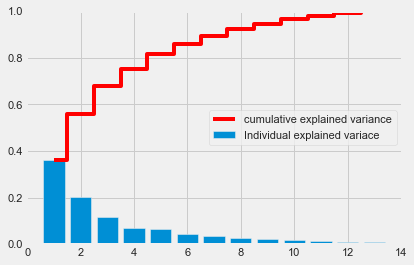

In [51]:
import matplotlib.pyplot as plt;import seaborn as sns;sns.set();plt.style.use('fivethirtyeight')
suma_eigvalues=np.sum(eigenvalues)
var_exp=[i/suma_eigvalues for i in  np.sort(eigenvalues)[::-1]]
cum_sum=np.cumsum(var_exp)

plt.bar(np.arange(1,14),var_exp,label='Individual explained variace');plt.ylim(0,1)
cum_sum
plt.step(np.arange(1,14),cum_sum,where='mid',color='red',label='cumulative explained variance')
plt.legend()


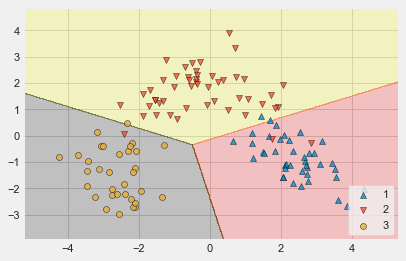

In [52]:
from sklearn.linear_model import LogisticRegression;from sklearn.decomposition import PCA
pca=PCA(n_components=2) ###Reduce el conjunto de datos de 13 caracteristicas a uno de sólo dos
X_train_pca=pca.fit_transform(X_train_std)  
X_test_pca=pca.transform(X_test_std)
lr=LogisticRegression()
lr.fit(X_train_pca,y_train)
from fronteras import visualizador
visualizador.visualizar_fronteras(X_train_pca,y_train,lr)


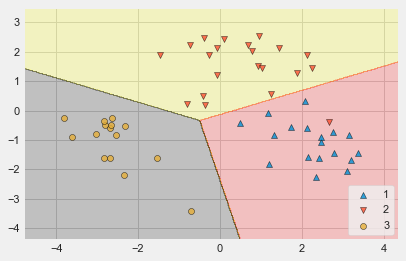

In [53]:
visualizador.visualizar_fronteras(X_test_pca,y_test,lr)

In [54]:
from sklearn.metrics import accuracy_score
y_predict=lr.predict(X_test_pca)
accuracy_score(y_test,y_predict)

0.9814814814814815